In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn


In [2]:
datapath = 'datasets/sentimentlabelledsentences/amazon_cells_labelled.txt'

reviews = pd.read_csv(datapath, sep = '\t', header = None)

In [3]:
reviews.columns = ['review', 'positive']
print(reviews.head())

                                              review  positive
0  So there is no way for me to plug it in here i...         0
1                        Good case, Excellent value.         1
2                             Great for the jawbone.         1
3  Tied to charger for conversations lasting more...         0
4                                  The mic is great.         1


In [4]:
print(reviews.head())

                                              review  positive
0  So there is no way for me to plug it in here i...         0
1                        Good case, Excellent value.         1
2                             Great for the jawbone.         1
3  Tied to charger for conversations lasting more...         0
4                                  The mic is great.         1


In [5]:
reviews.positive = (reviews.positive == True)
print(reviews.head())

                                              review  positive
0  So there is no way for me to plug it in here i...     False
1                        Good case, Excellent value.      True
2                             Great for the jawbone.      True
3  Tied to charger for conversations lasting more...     False
4                                  The mic is great.      True


In [6]:
poswords = []
poswordcount = []
negwords = []
negwordcount = []

In [7]:
#instead of guessing which words are more common, we'll let the computer figure it out for us
#we'll count unique words, separated by positive/negative sentiment, and see if there are some common ones
#positive reviews first
for sentence in reviews[reviews.positive==1].review:
    wordlist = sentence.split()
    #for each positive review, split it up into its words
    for word in wordlist:
        word = word.strip('.!?,\';:+-()[]{}/@%$_')#remove special characters and only compare in lowercase
        if word.lower() in poswords:#if we already recorded this word just increment the count of it
            poswordcount[poswords.index(word.lower())] += 1
        else:#if we haven't found this word before, add it to the list, and give it a count of 1
            poswords.append(word.lower())
            poswordcount.append(1)

print(poswords[:5])
print(len(poswords))
print(poswordcount[:5])
print(len(poswordcount))

['good', 'case', 'excellent', 'value', 'great']
1149
[62, 18, 26, 5, 92]
1149


In [8]:
#now for negative reviews
for sentence in reviews[reviews.positive==0].review:
    wordlist = sentence.split()
    #for each negative review, split it up into its words
    for word in wordlist:
        word = word.strip('.!?,\';:+-()[]{}/@%$_')#remove special characters and only compare in lowercase
        if word.lower() in negwords:#if we already recorded this word just increment the count of it
            negwordcount[negwords.index(word.lower())] += 1
        else:#if we haven't found this word before, add it to the list, and give it a count of 1
            negwords.append(word.lower())
            negwordcount.append(1)
            
print(negwords[:5])
print(len(negwords))
print(negwordcount[:5])
print(len(negwordcount))

['so', 'there', 'is', 'no', 'way']
1311
[16, 9, 102, 14, 5]
1311


In [9]:
poswordframe = pd.DataFrame()
poswordframe['poswords'] = poswords
poswordframe['poswordcount'] = poswordcount

negwordframe = pd.DataFrame()
negwordframe['negwords'] = negwords
negwordframe['negwordcount'] = negwordcount

In [10]:
print(poswordframe.head())
print(negwordframe.head())

    poswords  poswordcount
0       good            62
1       case            18
2  excellent            26
3      value             5
4      great            92
  negwords  negwordcount
0       so            16
1    there             9
2       is           102
3       no            14
4      way             5


c:\users\nekon\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
c:\users\nekon\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


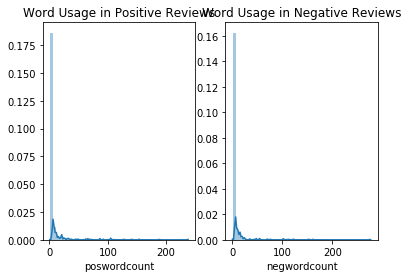

avg pos word count: 4.3141862489120975
avg neg word count: 4.034324942791762


In [11]:
plt.subplot(121)
plt.title('Word Usage in Positive Reviews')
sns.distplot(poswordframe.poswordcount)
plt.subplot(122)
plt.title('Word Usage in Negative Reviews')
sns.distplot(negwordframe.negwordcount)
plt.show()

print('avg pos word count: ' + str((sum(poswordcount)/len(poswordcount))))
print('avg neg word count: ' + str((sum(negwordcount)/len(negwordcount))))

In [12]:
'''#let's just see if we can get all the words used more than 10 times
#if there aren't too many words, we'll use these as features, otherwise we'll cut down the number of words again
commonposwords = poswordframe[poswordframe.poswordcount >= 1]
commonnegwords = negwordframe[negwordframe.negwordcount >= 1]
#commonposwords = commonposwords.sort_values(by='poswordcount', ascending=False)
#commonnegwords = commonnegwords.sort_values(by='negwordcount', ascending=False)
print(commonposwords.head())
print(commonnegwords.head())'''

"#let's just see if we can get all the words used more than 10 times\n#if there aren't too many words, we'll use these as features, otherwise we'll cut down the number of words again\ncommonposwords = poswordframe[poswordframe.poswordcount >= 1]\ncommonnegwords = negwordframe[negwordframe.negwordcount >= 1]\n#commonposwords = commonposwords.sort_values(by='poswordcount', ascending=False)\n#commonnegwords = commonnegwords.sort_values(by='negwordcount', ascending=False)\nprint(commonposwords.head())\nprint(commonnegwords.head())"

In [13]:
shared = commonposwords.iloc[np.where(commonposwords.poswords.isin(commonnegwords.negwords))]
uniquepos = poswordframe[~poswordframe.poswords.isin(negwordframe.negwords)]
uniqueneg = negwordframe[~negwordframe.negwords.isin(poswordframe.poswords)]

NameError: name 'commonposwords' is not defined

In [14]:
for posword in uniquepos.poswords:
    reviews[posword] = reviews.review.str.contains(posword, case=False)
print(reviews.head())

NameError: name 'uniquepos' is not defined

In [15]:
for negword in uniqueneg.negwords:
    reviews[negword] = ~reviews.review.str.contains(negword, case=False)
print(reviews.head())

NameError: name 'uniqueneg' is not defined

In [16]:
features = reviews[uniquepos.poswords.tolist() + uniqueneg.negwords.tolist()]
results = reviews.positive

NameError: name 'uniquepos' is not defined

In [17]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()

model.fit(features, results)

NameError: name 'features' is not defined

In [18]:
predictions = model.predict(features)

print('Total reviews: ' + str(features.shape[0]))
print('Correct predictions : ' + str((results==predictions).sum()))

NameError: name 'features' is not defined

Well, it works with 81.6 percent accuracy for the amazon reviews. I guess that's ok. 
After trying it on the yelp reviews, the same approach had 83.3% accuracy when used to predict the training data.
(I point out that it is predicting the training data because this does not guarantee that it will work on other data)

Time to do some holdout tests to see how good our model really is.

need to holdout a section of the input (the features the model takes as input) and the corresponding actual result of the heldout inputs. It sure was convenient to make features = the features and results = the results

In [71]:
from sklearn.model_selection import train_test_split

trainfeatures, testfeatures, trainresults, testresults = train_test_split(features, results, test_size = .2)

print('Testing the model on the full dataset: ' + str(model.fit(features, results).score(features, results)))
print('Testing the model on the heldout dataset: '+str(model.fit(trainfeatures, trainresults).score(testfeatures, testresults)))


Testing the model on the full dataset: 0.753
Testing the model on the heldout dataset: 0.73


After trying different random seeds in the train_test_split, it seems like the accuracy of the model went down on the holdout groups, so it seems like the model is overfitting.

Let's do some cross validation just for practice purposes.

In [72]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, features, results, cv=10)

array([0.83, 0.77, 0.81, 0.72, 0.77, 0.66, 0.68, 0.74, 0.77, 0.69])

Changelog:

Version 1.0.0- Basic classifier completed
This was not very good because it was overfit to the training data, and didn't have consistent results with holdout tests and cross validation

Version 1.1.0- Reduced number of features by doubling the required number of occurences a word must have to be a feature. the model was less accurate (because it wasn't overfit), but was more consistent with the holdout tests it seems

Version 1.1.1- Doubled the number of required word occurences for feature qualification again. The tests are again more consistent, but the model itself is only like 75% accurate on average it seems, so it probably needs some better features.

Version 1.2.0- Kept all words, making the pool of positive and negative reviews both equivalent to a bag of words.